## Building an Image Classifier Using MLP 

**MLPs are also known as SNNs,FNNs and FFNNs**

Let us import the requried libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

### Get the Data.... 

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.ndim

3

Note: `ndim` of an N-dimentional array is also called rank of the array or axes of the array. Do not get confused ndim/rank/axes of an Ndimentional tensor with the number of dimentions in a n-dimentional vector space

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a smaller validation set and a training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.0

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

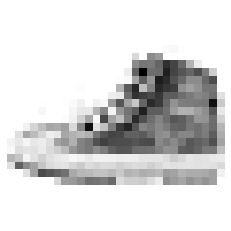

In [9]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

And the class of 25th image in train set is:

In [13]:
class_names[y_train[24]]

'Trouser'

**Exercise:** Wirte a matplotlib or seaborn script to display a image grid of 40 images with 4 rows and 10 columns with class names at the bottom of each image, use training set or validation set.

### Build A Model

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Instead of adding the layers one by one as we  just did above, you can pass a list of layers when creating the Sequential model:

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

You can easily get a model's list of layers,summary of the model and also the structure of the model as a graph with input and output tensor shapes as below: 

In [17]:
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


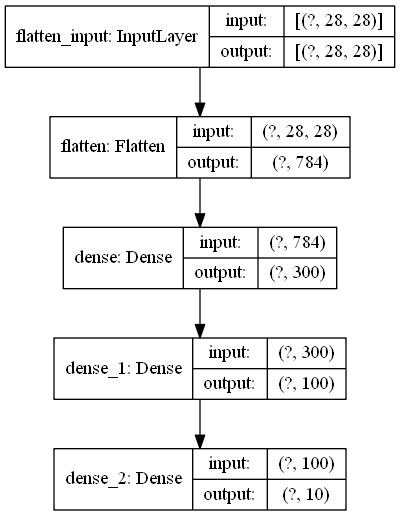

In [19]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [20]:
hidden_layer1 = model.layers[1]
hidden_layer1.name

'dense'

In [21]:
hidden_layer2 = model.layers[2]
hidden_layer2.name

'dense_1'

In [22]:
weights, biases = hidden_layer2.get_weights()

In [23]:
weights.shape

(300, 100)

In [24]:
biases.shape

(100,)

In [25]:
hidden_layer1.get_config()

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 300,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

**What are Activations, Initializers, Regularizers and Constraints**

In [26]:
output_layer = model.layers[3]

In [27]:
output_layer.name

'dense_2'

In [28]:
config_of_output_layer = output_layer.get_config()
config_of_output_layer

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 10,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [29]:
output_layer_weights,output_layer_biases = output_layer.get_weights()

In [30]:
output_layer_weights.shape

(100, 10)

In [31]:
output_layer_weights

array([[ 1.12742752e-01,  6.00438714e-02, -2.25429326e-01,
        -7.32669234e-02,  4.96883690e-03, -5.71009815e-02,
        -1.99350551e-01, -2.23567635e-01, -9.94094461e-02,
        -1.35171115e-02],
       [ 9.04370248e-02, -1.99351788e-01,  2.02026099e-01,
        -1.36191919e-01,  9.39141810e-02, -1.93547606e-02,
         1.67981148e-01,  2.00545996e-01, -1.38766289e-01,
         1.25488609e-01],
       [ 4.67847884e-02, -1.07247218e-01,  1.78341419e-01,
        -2.08489627e-01, -3.60859334e-02,  1.82345212e-01,
         1.34853154e-01, -1.86066300e-01, -1.42891139e-01,
        -1.03244305e-01],
       [-4.89864200e-02, -1.76399082e-01, -5.41257560e-02,
         2.08106577e-01,  1.28894538e-01,  2.07589895e-01,
        -2.13480458e-01, -1.18598342e-02,  7.23187029e-02,
         3.06938589e-02],
       [-1.68816119e-01, -9.32020694e-02, -7.88614601e-02,
        -1.73261091e-01,  6.70591891e-02, -2.11411119e-02,
         8.81972015e-02, -9.24687833e-02, -3.95725667e-03,
        -1.

In [32]:
output_layer_biases.shape

(10,)

In [33]:
output_layer_biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Compiling the model

After a model is created you must call its `compile()`method to specify the **loss function** and **optimizer** to use.

Optionally, you can specify a ***list*** of of extra metrics to compute during training and evaluation like this:

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

**What are Losses (Loss functions),Optimizers and Metrics**

### Training and evaluating the model

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/30
55000/55000 [==============================] -

In [37]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0, 1)

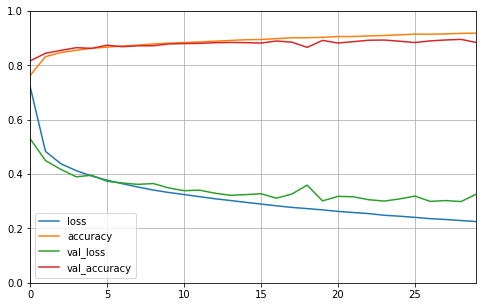

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


**Exercise:** plot the above graph using Seaborn or Altair and how do you save this graph in png format in your project folder

In [41]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3610996503472328, 0.8681]

### Using the model to make predictions and Saving the Model

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

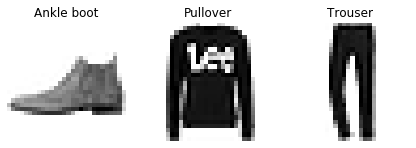

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)



In [48]:
model.save("my_keras_model.h5")

**Exercise:** Load this saved model and use it to predict the last ten examples/instances of test set and compare the results with the ground truths.

### Using Callbacks during Training

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_kera_model_02.h5")

In [ ]:
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_kera_model_03.h5", save_best_only=True)

In [54]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/10
55000/55000 [==============================] -

In [55]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [56]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3245 - accuracy: 0.8847 - val_loss: 0.3438 - val_accuracy: 0.8768
Epoch 2/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3158 - accuracy: 0.8872 - val_loss: 0.3342 - val_accuracy: 0.8794
Epoch 3/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3078 - accuracy: 0.8897 - val_loss: 0.3274 - val_accuracy: 0.8822
Epoch 4/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3019 - accuracy: 0.8917 - val_loss: 0.3258 - val_accuracy: 0.8844
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2956 - accuracy: 0.8950 - val_loss: 0.3256 - val_accuracy: 0.8866
Epoch 6/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2892 - accuracy: 0.8971 - val_loss: 0.3177 - val_accuracy: 0.8892
Epoch 7/10
55000/55000 [==============================] -

Note: We can easily write our own custom callbacks. As an example of how to do that is here:

The following custom callback will displaythe ratio between validation loss and training loss during training, which can detect overfitting

In [57]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [58]:
val_train_ratio_cb = PrintValTrainRatioCallback()

In [59]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb,val_train_ratio_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54656/55000 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.9054
val/train: 1.18
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2631 - accuracy: 0.9053 - val_loss: 0.3094 - val_accuracy: 0.8862
Epoch 2/10
54752/55000 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9080
val/train: 1.20
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2573 - accuracy: 0.9081 - val_loss: 0.3094 - val_accuracy: 0.8916
Epoch 3/10
54720/55000 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.9095
val/train: 1.20
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2524 - accuracy: 0.9096 - val_loss: 0.3027 - val_accuracy: 0.8916
Epoch 4/10
54624/55000 [============================>.] - ETA: 0s - loss: 0.2491 - accuracy: 0.9102
val/train: 1.22
55000/55000 [==============================] - 5s 95us/sample - loss: 0.2

Think of : `on_train_begin()` , `on_train_end()`
            `on_epoch_begin()` , `on_epoch_end()`
            `on_batch_begin()` , `on_batch_end()`

### TensorBoard

In [76]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [77]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2019_11_04-10_39_48'

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [80]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/30
55000/55000 [==============================] -